In [20]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests 
from config import weather_api_key
import sys
from datetime import datetime

In [21]:
# Create a set of random latitute and longitude combinations.
lats = np.random.uniform(low = -90.000, high= 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high= 180.000, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [22]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [23]:
#Create a list for holding the cities.
cities = []
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If the city name is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

636

In [24]:
cities

['dikson',
 'esperance',
 'jamestown',
 'nanortalik',
 'kahului',
 'san cristobal',
 'clinton',
 'avarua',
 'sao filipe',
 'port alfred',
 'fairbanks',
 'sentyabrskiy',
 'georgetown',
 'albany',
 'neuquen',
 'sorland',
 'pytalovo',
 'tasiilaq',
 'harnosand',
 'cape town',
 'taolanaro',
 'saint anthony',
 'port lavaca',
 'olafsvik',
 'ormara',
 'nikolskoye',
 'punta arenas',
 'polson',
 'novoaleksandrovsk',
 'hobart',
 'shinyanga',
 'mataura',
 'santa luzia',
 'fasano',
 'sao miguel do araguaia',
 'lethem',
 'tsihombe',
 'provideniya',
 'tukrah',
 'dunmore',
 'port moresby',
 'kapaa',
 'aksarka',
 'east london',
 'bluff',
 'brora',
 'yellowknife',
 'shingu',
 'butaritari',
 'hithadhoo',
 'juneau',
 'busselton',
 'lebu',
 'ulladulla',
 'bambous virieux',
 'port lincoln',
 'bolonchen',
 'chokurdakh',
 'rikitea',
 'port macquarie',
 'montepuez',
 'inderborskiy',
 'lasa',
 'nome',
 'ucluelet',
 'nara',
 'tual',
 'castro',
 'carahue',
 'vaini',
 'port elizabeth',
 'barentsburg',
 'alyangula'

In [40]:
url=f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"


In [42]:


# Create an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    #city_url = f'{url}&q={city.replace(" ","+")}'
    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}") 
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | esperance
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | nanortalik
Processing Record 5 of Set 1 | kahului
Processing Record 6 of Set 1 | san cristobal
Processing Record 7 of Set 1 | clinton
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | sao filipe
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | fairbanks
Processing Record 12 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | neuquen
Processing Record 16 of Set 1 | sorland
Processing Record 17 of Set 1 | pytalovo
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | harnosand
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 

Processing Record 39 of Set 4 | waipawa
Processing Record 40 of Set 4 | gat
Processing Record 41 of Set 4 | stornoway
Processing Record 42 of Set 4 | cortez
Processing Record 43 of Set 4 | lolua
City not found. Skipping...
Processing Record 44 of Set 4 | sheffield
Processing Record 45 of Set 4 | kichera
Processing Record 46 of Set 4 | cherskiy
Processing Record 47 of Set 4 | palana
Processing Record 48 of Set 4 | sulangan
Processing Record 49 of Set 4 | nykoping
Processing Record 50 of Set 4 | upernavik
Processing Record 1 of Set 5 | santarem
Processing Record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 5 | aklavik
Processing Record 4 of Set 5 | havoysund
Processing Record 5 of Set 5 | pedernales
Processing Record 6 of Set 5 | kaitangata
Processing Record 7 of Set 5 | chake chake
Processing Record 8 of Set 5 | saleaula
City not found. Skipping...
Processing Record 9 of Set 5 | grindavik
Processing Record 10 of Set 5 | mendahara
City not found. Skip

City not found. Skipping...
Processing Record 27 of Set 8 | myitkyina
Processing Record 28 of Set 8 | alta floresta
Processing Record 29 of Set 8 | solwezi
Processing Record 30 of Set 8 | smirnykh
Processing Record 31 of Set 8 | jiutai
Processing Record 32 of Set 8 | nalut
Processing Record 33 of Set 8 | solnechnyy
Processing Record 34 of Set 8 | galiwinku
City not found. Skipping...
Processing Record 35 of Set 8 | kabelvag
Processing Record 36 of Set 8 | dongsheng
Processing Record 37 of Set 8 | yialos
City not found. Skipping...
Processing Record 38 of Set 8 | avera
Processing Record 39 of Set 8 | souillac
Processing Record 40 of Set 8 | tecozautla
Processing Record 41 of Set 8 | mar del plata
Processing Record 42 of Set 8 | lorengau
Processing Record 43 of Set 8 | hami
Processing Record 44 of Set 8 | chopinzinho
Processing Record 45 of Set 8 | burkhala
City not found. Skipping...
Processing Record 46 of Set 8 | teya
Processing Record 47 of Set 8 | ardmore
Processing Record 48 of Set

Processing Record 13 of Set 12 | salisbury
Processing Record 14 of Set 12 | bitung
Processing Record 15 of Set 12 | morgan city
Processing Record 16 of Set 12 | antofagasta
Processing Record 17 of Set 12 | palmer
Processing Record 18 of Set 12 | simi
Processing Record 19 of Set 12 | ornskoldsvik
Processing Record 20 of Set 12 | zarubino
Processing Record 21 of Set 12 | belawan
Processing Record 22 of Set 12 | cockburn town
Processing Record 23 of Set 12 | limulunga
Processing Record 24 of Set 12 | urucara
Processing Record 25 of Set 12 | takoradi
Processing Record 26 of Set 12 | flinders
Processing Record 27 of Set 12 | verkhnetulomskiy
Processing Record 28 of Set 12 | zhukovo
Processing Record 29 of Set 12 | vestmanna
Processing Record 30 of Set 12 | atar
Processing Record 31 of Set 12 | tezze sul brenta
Processing Record 32 of Set 12 | zlatoustovsk
City not found. Skipping...
Processing Record 33 of Set 12 | kiunga
Processing Record 34 of Set 12 | hammerfest
Processing Record 35 of S

In [44]:
len(city_data)

580

In [45]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.51,80.55,32.94,98,90,17.05,RU,2020-06-18 22:28:31
1,Esperance,-33.87,121.90,46.40,100,40,10.29,AU,2020-06-18 22:28:31
2,Jamestown,42.10,-79.24,80.60,39,20,9.17,US,2020-06-18 22:24:52
3,Nanortalik,60.14,-45.24,39.76,82,87,6.31,GL,2020-06-18 22:28:32
4,Kahului,20.89,-156.47,91.40,41,20,24.16,US,2020-06-18 22:28:32
5,San Cristobal,7.77,-72.22,75.20,94,75,4.70,VE,2020-06-18 22:26:27
6,Clinton,42.59,-82.92,87.01,42,75,7.45,US,2020-06-18 22:28:32
7,Avarua,-21.21,-159.78,75.20,64,73,10.29,CK,2020-06-18 22:27:30
8,Sao Filipe,14.90,-24.50,80.28,63,0,13.56,CV,2020-06-18 22:24:39
9,Port Alfred,-33.59,26.89,62.33,53,0,12.41,ZA,2020-06-18 22:26:23


In [46]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [47]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2020-06-18 22:28:31,73.51,80.55,32.94,98,90,17.05
1,Esperance,AU,2020-06-18 22:28:31,-33.87,121.90,46.40,100,40,10.29
2,Jamestown,US,2020-06-18 22:24:52,42.10,-79.24,80.60,39,20,9.17
3,Nanortalik,GL,2020-06-18 22:28:32,60.14,-45.24,39.76,82,87,6.31
4,Kahului,US,2020-06-18 22:28:32,20.89,-156.47,91.40,41,20,24.16
5,San Cristobal,VE,2020-06-18 22:26:27,7.77,-72.22,75.20,94,75,4.70
6,Clinton,US,2020-06-18 22:28:32,42.59,-82.92,87.01,42,75,7.45
7,Avarua,CK,2020-06-18 22:27:30,-21.21,-159.78,75.20,64,73,10.29
8,Sao Filipe,CV,2020-06-18 22:24:39,14.90,-24.50,80.28,63,0,13.56
9,Port Alfred,ZA,2020-06-18 22:26:23,-33.59,26.89,62.33,53,0,12.41


In [60]:
#Create an output file (CSV).
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [61]:
#Extract the relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [62]:
import time

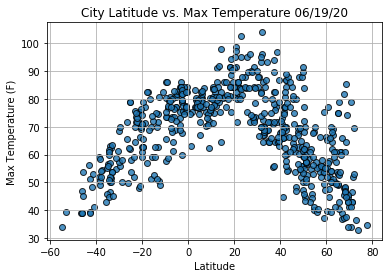

In [63]:
#Build the scatter plot for latitude vs max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")

#Incorporate the other graph qualities.
plt.title(f"City Latitude vs. Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

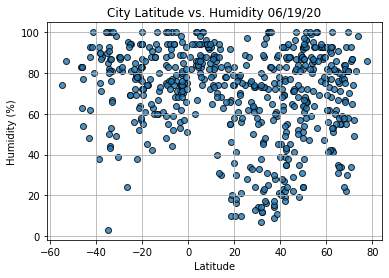

In [64]:
#Build the scatter plot for latitude vs humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure
plt.savefig("weather_data/Fig2.png")
#Show the plot
plt.show()

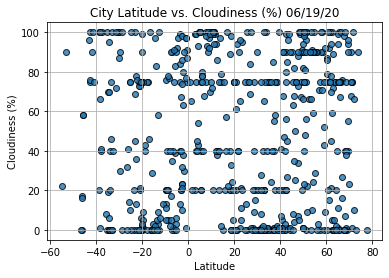

In [65]:
#Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure
plt.savefig("weather_data/Fig3.png")
#Show plot
plt.show()

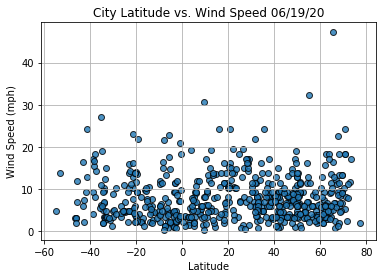

In [66]:
#Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")
#Show the plot
plt.show()

In [102]:
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [103]:
index13 = city_data_df.loc[13]
index13

City                      Neuquen
Country                        AR
Date          2020-06-18 22:28:33
Lat                        -38.95
Lng                        -68.06
Max Temp                       59
Humidity                       38
Cloudiness                    100
Wind Speed                  17.22
Name: 13, dtype: object

In [104]:
city_data_df["Lat"] >= 0

City_ID
0       True
1      False
2       True
3       True
4       True
       ...  
575    False
576    False
577     True
578     True
579     True
Name: Lat, Length: 580, dtype: bool

In [105]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,,,
0,Dikson,RU,2020-06-18 22:28:31,73.51,80.55,32.94,98,90,17.05
2,Jamestown,US,2020-06-18 22:24:52,42.10,-79.24,80.60,39,20,9.17
3,Nanortalik,GL,2020-06-18 22:28:32,60.14,-45.24,39.76,82,87,6.31
4,Kahului,US,2020-06-18 22:28:32,20.89,-156.47,91.40,41,20,24.16
5,San Cristobal,VE,2020-06-18 22:26:27,7.77,-72.22,75.20,94,75,4.70
...,...,...,...,...,...,...,...,...,...
573,Tecoanapa,MX,2020-06-18 22:30:27,16.52,-98.75,86.27,66,57,10.51
574,Penzance,GB,2020-06-18 22:30:27,50.12,-5.54,59.00,87,100,13.87
577,Paamiut,GL,2020-06-18 22:30:27,61.99,-49.67,39.54,84,45,15.75


In [106]:
#Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

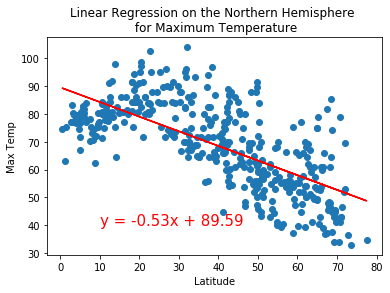

In [107]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

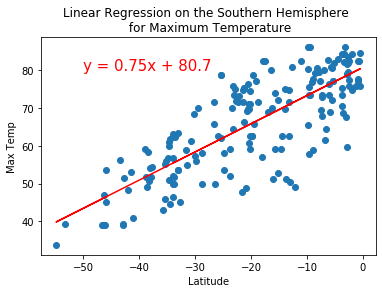

In [113]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

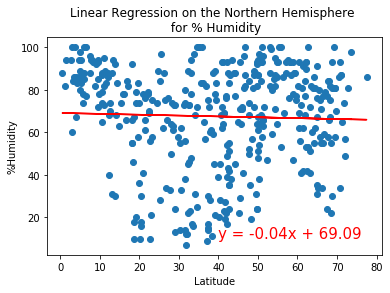

In [114]:
#Create the regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '%Humidity',(40,10))

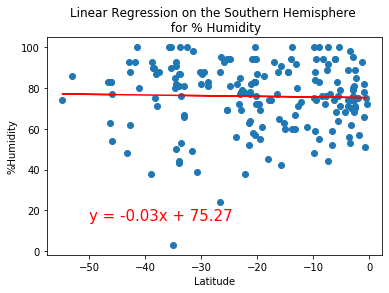

In [116]:
#Create the regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '%Humidity',(-50,15))

In [117]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,,,
0,Dikson,RU,2020-06-18 22:28:31,73.51,80.55,32.94,98,90,17.05
1,Esperance,AU,2020-06-18 22:28:31,-33.87,121.90,46.40,100,40,10.29
2,Jamestown,US,2020-06-18 22:24:52,42.10,-79.24,80.60,39,20,9.17
3,Nanortalik,GL,2020-06-18 22:28:32,60.14,-45.24,39.76,82,87,6.31
4,Kahului,US,2020-06-18 22:28:32,20.89,-156.47,91.40,41,20,24.16


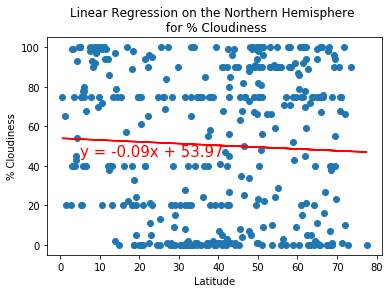

In [121]:
#Create the regression on the Northern Hemisphere (Cloudiness)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(5,45))

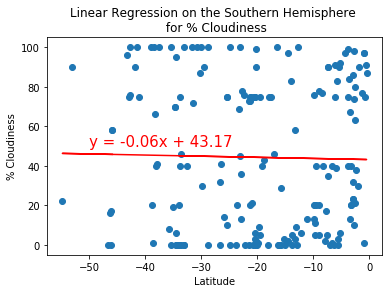

In [126]:
#Create the regression on the Southern Hemisphere (Cloudiness)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,50))

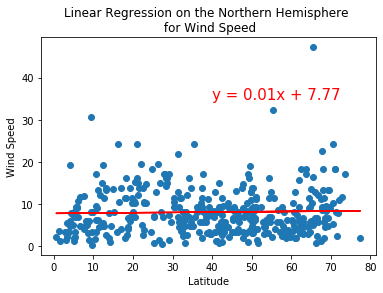

In [127]:
#Create the regression on the Northern Hemisphere (Wind)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

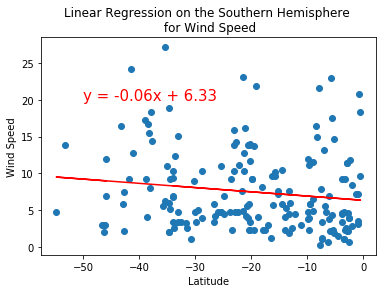

In [129]:
#Create the regression on the Southern Hemisphere (Wind)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))